In [2]:
#%run utility_getinputhits_genpart.py
#%qtconsole --style monokai

In [1]:
from HGCalImageAlgo3D import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

Welcome to JupyROOT 6.10/00


In [7]:
#DatasetFile = 'SinglePi_noPU'
DatasetFile = 'SinglePi_PU200'
DatasetDir  = "/Users/zihengchen/Documents/HGCal/clustering/data/"
df    = pd.read_pickle(DatasetDir+"input/"+DatasetFile+"_rechit.pkl")

# 1. Run clustering

In [8]:
SetImagingAlgo(KERNAL_R_ = 2,#cm
               KERNAL_Z_ = 1,#cm
               KERNAL_EXPC_ = 0.5, #cm
               MAXDISTANCE_ = 200,#cm
               DECISION_RHO_KAPPA_ = 10,
               DECISION_NHD_ = 4,#cm
               AFFINITY_Z_ = 0.5,
               CONTINUITY_NHD_ = 6#cm
              )
dfresultclus = RunImagingAlgo(df,N=100)
dfresultclus.to_pickle(DatasetDir+"output/"+DatasetFile+"_OutputClus.pkl")

100%|██████████| 100/100 [09:02<00:00,  5.74s/it]


# 2. Resolution Plots

In [9]:
from utility_benchmark import *
energyeff_nopu = energyeff(DatasetDir,DatasetFile,deltarho = 5)
print("noPU:  sigma,mean: {}".format(effsigma(energyeff_nopu)))

noPU:  sigma,mean: (0.21650482399625515, 0.96419042591581361)


noPU:  sigma,mean: (0.15807304290559193, 0.84482715840850542)
PU200: sigma,mean: (0.21650482399625515, 0.96419042591581361)


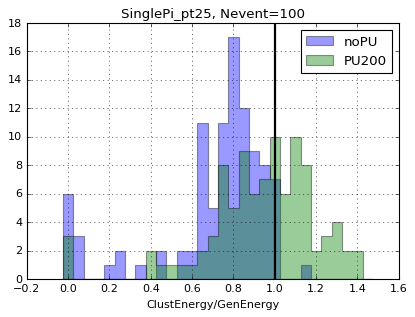

In [12]:
deltarho = 5
energyeff_nopu = energyeff(DatasetDir,'SinglePi_noPU',deltarho)
energyeff_pu200 = energyeff(DatasetDir,'SinglePi_PU200',deltarho)

print("noPU:  sigma,mean: {}".format(effsigma(energyeff_nopu)))
print("PU200: sigma,mean: {}".format(effsigma(energyeff_pu200)))
    
plt.hist(energyeff_nopu,bins=np.arange(0-0.025,1.5,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="noPU")
plt.hist(energyeff_pu200,bins=np.arange(0-0.025,1.5,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="PU200")
plt.axvline(1,lw=2,c="k")
plt.grid(True)
plt.legend()
plt.xlabel("ClustEnergy/GenEnergy")
plt.title("SinglePi_pt25, Nevent=100")
plt.savefig("../plot/pu200.png")